# tensorflow 入门
## 使用顺序 API 构建图像分类器
### 准备数据

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 训练模型
#### 利用顺序 API

In [2]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])
model.save("keras_model.h5")

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
   1/1719 [..............................] - ETA: 4:00 - loss: 2.5370 - accuracy: 0.0312

2022-01-18 15:59:05.520653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-18 15:59:05.521691: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


1707/1719 [============================>.] - ETA: 0s - loss: 0.9810 - accuracy: 0.6866  

#### 可微调超参数的训练

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping

def build_model(n_hidden=1, n_neurons=50, learning_rate=3e-3, input_shape=[28, 28]):
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation='relu'))
    # model.add(layers.Dense(300, activation='relu'))
    # model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

keras_cls = keras.wrappers.scikit_learn.KerasClassifier(build_model)

# keras_cls.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
# mse_test = keras_cls.score(X_test, y_test)

param_dist = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(30, 100),
    "learning_rate": reciprocal(3e-6, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_cls, param_dist, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-01-18 11:01:46.641540: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-18 11:01:46.641704: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


1025/1146 [=========================>....] - ETA: 0s - loss: 1.0839 - accuracy: 0.6469  WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x14dc9a1f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Ca

### 评估模型

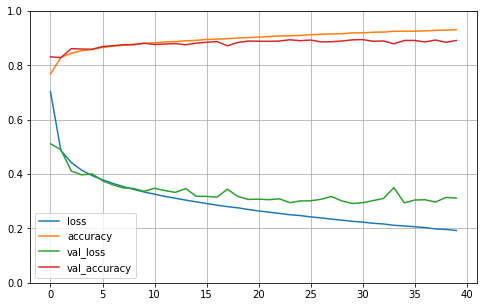

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 使用模型进行预测

In [ ]:
mse_evaluation = model.evaluate(X_test, y_test)
model.predict(X_test)